In [75]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import re


[nltk_data] Downloading package stopwords to C:\Users\Omar
[nltk_data]     Nabawi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classification Report of MultinomialNB():
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2304
           1       0.96      0.82      0.88      1760

    accuracy                           0.90      4064
   macro avg       0.91      0.89      0.90      4064
weighted avg       0.91      0.90      0.90      4064



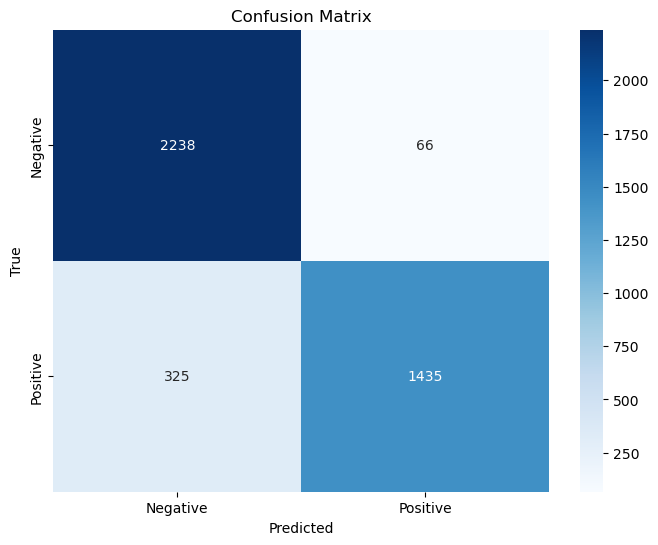

Classification Report of LogisticRegression(max_iter=1000):
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2304
           1       0.96      0.79      0.87      1760

    accuracy                           0.90      4064
   macro avg       0.91      0.88      0.89      4064
weighted avg       0.90      0.90      0.89      4064



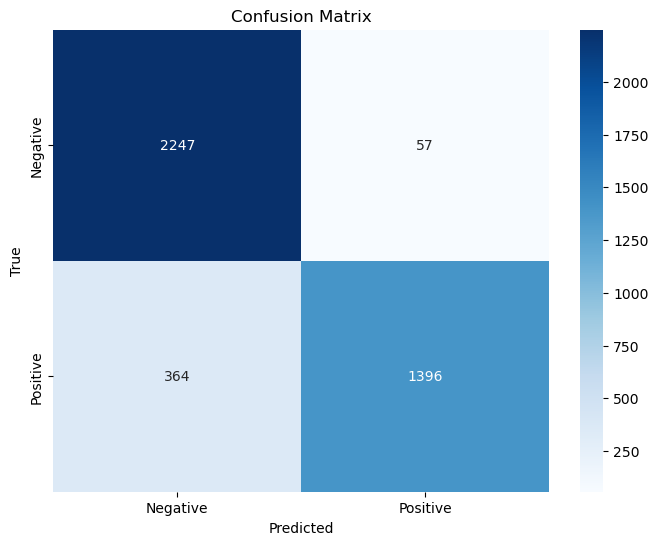

Classification Report of SVC():
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2304
           1       0.99      0.95      0.97      1760

    accuracy                           0.97      4064
   macro avg       0.98      0.97      0.97      4064
weighted avg       0.97      0.97      0.97      4064



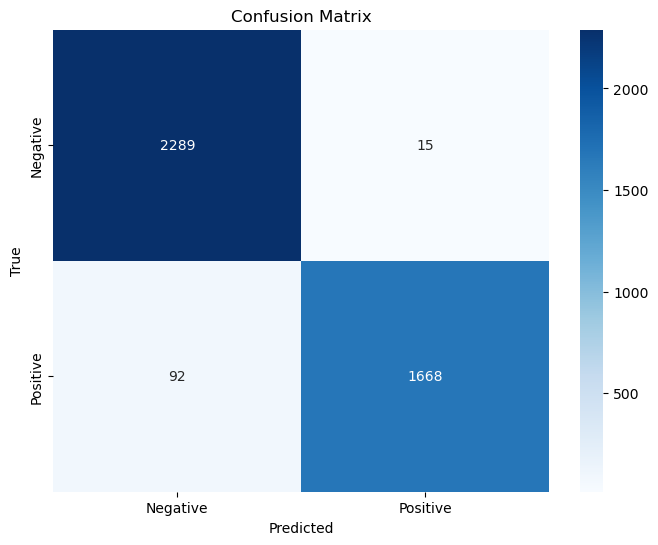

Classification Report of MLPClassifier(hidden_layer_sizes=(140,), max_iter=1000):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2304
           1       0.99      0.98      0.99      1760

    accuracy                           0.99      4064
   macro avg       0.99      0.99      0.99      4064
weighted avg       0.99      0.99      0.99      4064



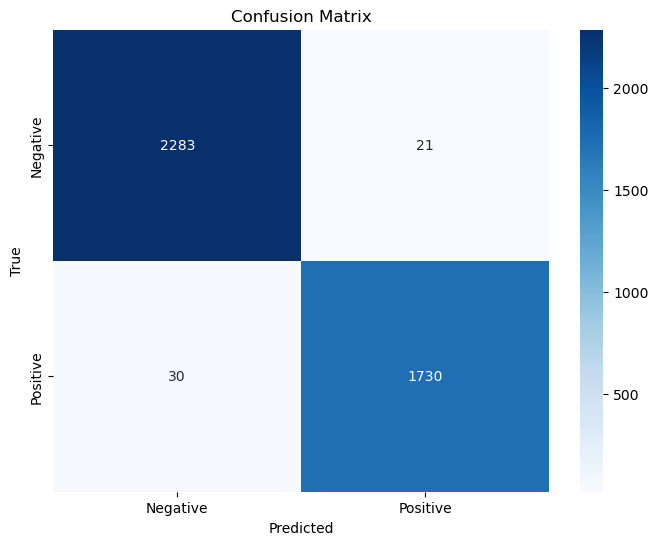

Best Model based on Accuracy: Naive Bayes


In [77]:

# Class for preprocessing text data
class Preprocessor:
    def __init__(self):
        nltk.download('stopwords')
        self.stopwords = set(nltk.corpus.stopwords.words('english'))
        self.stemmer = nltk.PorterStemmer()
        self.lemmatizer = nltk.WordNetLemmatizer()
    def clean_text(self,text):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
    
        return text

# Apply the clean_text function to the 'text' column
#

    def process_text(self, text):
        text = text.lower()  # Convert to lowercase
        text = ' '.join([word for word in text.split() if word not in self.stopwords])  # Remove stopwords
        text = ' '.join([self.stemmer.stem(word) for word in text.split()])  # Apply stemming
        # text = ' '.join([self.lemmatizer.lemmatize(word) for word in text.split()])  # Apply lemmatization
        return text

# Class for feature extraction
class FeatureExtractor:
    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_transform_tfidf(self, X):
        return self.vectorizer.fit_transform(X)

# Class for model training and evaluation
class ModelEvaluator:
    def __init__(self):
        pass
    
    def evaluate_model(self, model, X, y):
        # Train the model
        model.fit(X, y)
        
        # Evaluate the model
        y_pred = model.predict(X)
        print(f"Classification Report of {model}:")
        print(classification_report(y, y_pred))
        
        # Plot the confusion matrix
        self.plot_confusion_matrix(y, y_pred)
    
    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

# Load data
df = pd.read_csv('train.csv')
df=df.dropna()
# Preprocess text data
preprocessor = Preprocessor()
df['text'] = df['text'].apply(preprocessor.clean_text)
df['clean_text'] = df['text'].apply(preprocessor.process_text)

# Feature extraction
feature_extractor = FeatureExtractor()
X = feature_extractor.fit_transform_tfidf(df['clean_text'])
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
model_evaluator = ModelEvaluator()

# Train and evaluate Naive Bayes
nb_model = MultinomialNB()
model_evaluator.evaluate_model(nb_model, X_train, y_train)

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
model_evaluator.evaluate_model(lr_model, X_train, y_train)

# Train and evaluate Support Vector Machines
svm_model = SVC()
model_evaluator.evaluate_model(svm_model, X_train, y_train)

# Train and evaluate Neural Networks
nn_model = MLPClassifier(hidden_layer_sizes=(140,), max_iter=1000)
model_evaluator.evaluate_model(nn_model, X_train, y_train)

# Compare models and select the best one
# For simplicity, let's compare accuracy
accuracy_scores = {
    'Naive Bayes': accuracy_score(y_test, nb_model.predict(X_test)),
    'Logistic Regression': accuracy_score(y_test, lr_model.predict(X_test)),
    'Support Vector Machines': accuracy_score(y_test, svm_model.predict(X_test)),
    'Neural Networks': accuracy_score(y_test, nn_model.predict(X_test))
}

best_model = max(accuracy_scores, key=accuracy_scores.get)
print("Best Model based on Accuracy:", best_model)


In [78]:
accuracy_scores

{'Naive Bayes': 0.8070866141732284,
 'Logistic Regression': 0.7854330708661418,
 'Support Vector Machines': 0.7854330708661418,
 'Neural Networks': 0.7559055118110236}

In [87]:
test_df = pd.read_csv('test.csv')

# Preprocess text data for testing
df['text'] = df['text'].apply(preprocessor.clean_text)
test_df['clean_text'] = test_df['text'].apply(preprocessor.process_text)

# Transform testing data using the same feature extractor
X_test = feature_extractor.vectorizer.transform(test_df['clean_text'])

# Make predictions using the trained models
nb_predictions = nb_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
nn_predictions = nn_model.predict(X_test)


In [7]:
predictions_df = pd.DataFrame({
    'Naive Bayes': nb_predictions,
    'Logistic Regression': lr_predictions,
    'Support Vector Machines': svm_predictions,
    'Neural Networks': nn_predictions
})


,Naive Bayes,Logistic Regression,Support Vector Machines,Neural Networks
0,1,1,1,0
1,0,1,1,1
2,1,1,1,1
3,1,1,0,1
4,1,1,1,1
...,...,...,...,...
3258,1,1,1,1
3259,0,0,0,0
3260,1,1,1,1
3261,1,1,1,0


In [88]:
test_df['pred']=nb_predictions

In [90]:
final_pred=test_df.drop(['id','keyword','location'],axis=1)

In [95]:
final_pred

,text,clean_text,pred
0,Just happened a terrible car crash,happen terribl car crash,1
1,"Heard about #earthquake is different cities, s...","heard #earthquak differ cities, stay safe ever...",0
2,"there is a forest fire at spot pond, geese are...","forest fire spot pond, gees flee across street...",1
3,Apocalypse lighting. #Spokane #wildfires,apocalyps lighting. #spokan #wildfir,1
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan,1
...,...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquak safeti lo angel ûò safeti fasten xrwn,0
3259,Storm in RI worse than last hurricane. My city...,storm ri wors last hurricane. city&amp;3oth ha...,0
3260,Green Line derailment in Chicago http://t.co/U...,green line derail chicago http://t.co/utbxlcbiuy,1
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issu hazard weather outlook (hwo) http://t...,1


# Disaster Analysis Project Using Natural Language Processing and Machine Learning
# Summary:
This project aims to analyze disasters using natural language processing and machine learning techniques by classifying social media tweets to distinguish between those related to natural disasters and those that are not. This objective was achieved through multiple technical stages including data preprocessing, text analysis, and machine learning model training.

# Summary of Results:
Several models were trained including Naive Bayes, Logistic Regression, Support Vector Machine, and Neural Networks.
Evaluation results showed that the Naive Bayes model achieved the highest accuracy at 80% compared to other models.
The model predictions can be used to enhance disaster response strategies through early warning and resource allocation guidance.
# Suggestions for Future Work:
Utilize advanced natural language processing techniques such as syntactic parsing and colloquial expressions.
Expand the dataset to include a wider variety of disasters and languages.
Develop mobile applications based on the trained model to provide real-time alerts and updates to users.
